In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
from pathlib import Path
import sys
parentDir = Path.cwd().parent
sys.path.insert(0, str(parentDir))
%matplotlib widget
import matplotlib.pyplot as plt

In [2]:
from utils.features_viz import emg_td_features, features_to_df
from utils.plotting_helpers import plot_feature_by_gesture, plot_feature_mean_sem
from utils.plotting_helpers import plot_feature_heatmap, radar_gesture_signature, pca_scatter

### Load pre-saved epoch data

In [3]:
epoch_data_path = parentDir / "data/processed/ninapro_ex1_win200_ms_step50_ms.npz"
save_figs = True

In [4]:
data = np.load(epoch_data_path)

X = data['X']
y = data['y']
subject_ids = data['subject_ids']
rep_ids = data['rep_ids']
t0 = data['t0']
coverage = data['coverage']
Fs = data['Fs']
n_channels = data['n_channels']
L = data['L']
Ld = data['Ld']
T_ms = data['T_ms']
S_ms = data['S_ms']
gesture_ids_all = data['gesture_ids_all']
exercise_number = data['exercise_number']
include_rest = data['include_rest']
majority_threshold = data['majority_threshold']

In [5]:
def keep_indices_excluding_rest(y: np.ndarray, rest_class: int = 0) -> np.ndarray:
    """Return indices of examples whose label != rest_class (no data copy)."""
    # y==0 is the rest class; using !=0 and .nonzero is very fast
    return np.flatnonzero(y != rest_class)

In [6]:
keep_indices = keep_indices_excluding_rest(y, rest_class=0)
X = X[keep_indices]
y = y[keep_indices]
subject_ids = subject_ids[keep_indices]
rep_ids = rep_ids[keep_indices]

In [ ]:
# Exclude rest class
# from utils.postprocessing import exclude_rest_class
X, y, subject_ids, rep_ids = exclude_rest_class(X, y, subject_ids, rep_ids)

In [7]:
print(f"Data shape: X={X.shape}, y={y.shape}, rep_ids={rep_ids.shape}, subject_ids={subject_ids.shape}")
print(f"Unique gestures: {np.unique(y)}")
print(f"Unique subjects: {np.unique(subject_ids)}")
print(f"Unique repetitions: {np.unique(rep_ids)}")

Data shape: X=(361730, 12, 400), y=(361730,), rep_ids=(361730,), subject_ids=(361730,)
Unique gestures: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17]
Unique subjects: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40]
Unique repetitions: [1 2 3 4 5 6]


### Check class balance

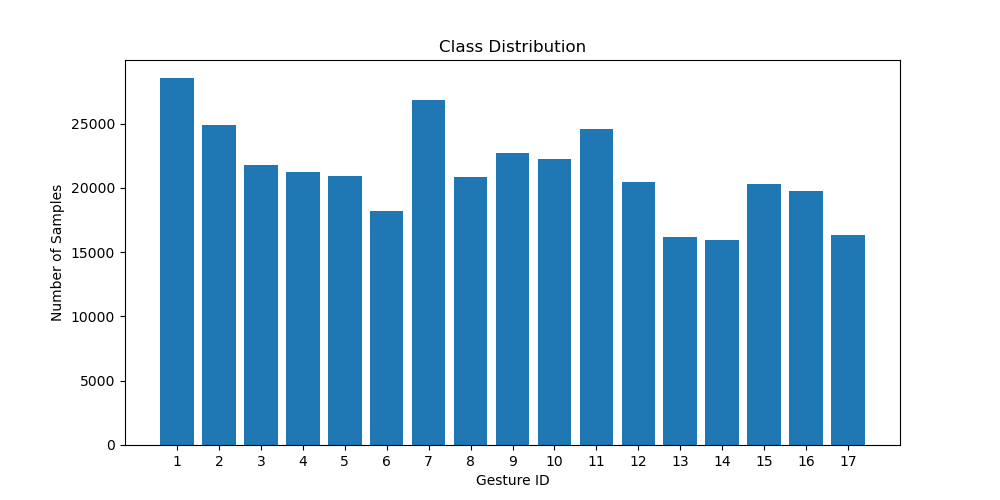

In [8]:
# Class counts
(unique, counts) = np.unique(y, return_counts=True)
class_counts = dict(zip(unique, counts))
# print("Class counts:", class_counts)
# Plot class distribution as a bar chart
plt.figure(figsize=(10, 5))
plt.bar(class_counts.keys(), class_counts.values())
plt.xticks(list(class_counts.keys()))
plt.xlabel("Gesture ID")
plt.ylabel("Number of Samples")
plt.title("Class Distribution")
plt.show()

# Generate classical ML features + DL

In [9]:
emg_features = emg_td_features(X, zc_thresh=0.02, ssc_thresh=0.02, batch_size=20000, flatten=False) # shape (n_samples, n_channels, n_features)
features_df = features_to_df(emg_features, y, subject_ids=subject_ids, rep_ids=rep_ids)

/opt/homebrew/Caskroom/miniforge/base/envs/emg-decode/lib/python3.11/site-packages/sklearn/decomposition/_pca.py:604: RuntimeWarning: divide by zero encountered in matmul
  C = X.T @ X
/opt/homebrew/Caskroom/miniforge/base/envs/emg-decode/lib/python3.11/site-packages/sklearn/decomposition/_pca.py:604: RuntimeWarning: overflow encountered in matmul
  C = X.T @ X
/opt/homebrew/Caskroom/miniforge/base/envs/emg-decode/lib/python3.11/site-packages/sklearn/decomposition/_pca.py:604: RuntimeWarning: invalid value encountered in matmul
  C = X.T @ X
/opt/homebrew/Caskroom/miniforge/base/envs/emg-decode/lib/python3.11/site-packages/sklearn/decomposition/_base.py:148: RuntimeWarning: divide by zero encountered in matmul
  X_transformed = X @ self.components_.T
/opt/homebrew/Caskroom/miniforge/base/envs/emg-decode/lib/python3.11/site-packages/sklearn/decomposition/_base.py:148: RuntimeWarning: overflow encountered in matmul
  X_transformed = X @ self.components_.T
/opt/homebrew/Caskroom/miniforge

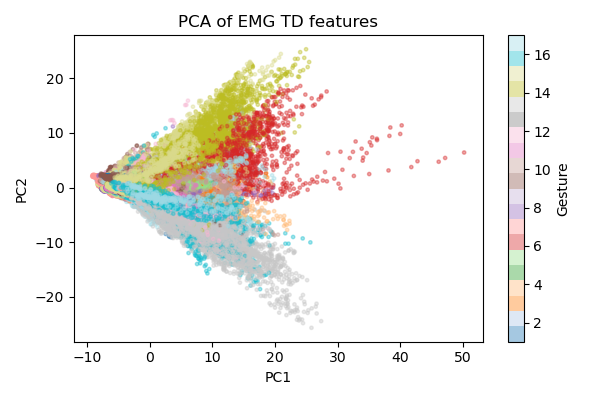

In [10]:
# plot_feature_by_gesture(features_df, feature="RMS", channel=5, figsize=(6, 4))
# plot_feature_mean_sem(features_df, feature="WL", channel=5, figsize=(6, 4))
# plot_feature_heatmap(features_df, feature="SSC", figsize=(6, 4))
# radar_gesture_signature(features_df, channel=5, gestures=[1,6,10,14], figsize=(6, 4))
pca_features = pca_scatter(emg_features, y, figsize=(6, 4))
if save_figs:
    plt.savefig(parentDir / "results/figures/feature_visualizations_PCA.png", dpi=300)